In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [89]:
KYOTO = pd.read_csv('../data/kyoto.csv', parse_dates=True)
JAPAN = pd.read_csv('../data/japan.csv', parse_dates=True)
DC = pd.read_csv('../data/washingtondc.csv', parse_dates=True)
SCHWIEZ = pd.read_csv('../data/liestal.csv', parse_dates=True)

In [90]:
def to_date(df):
    df['bloom_date'] = pd.to_datetime(df['bloom_date'], format='%Y-%m-%d')
    return df

In [91]:
JAPAN = to_date(JAPAN)
DC = to_date(DC)
SCHWIEZ = to_date(SCHWIEZ)

In [101]:
def plot_scatter(dfs=list):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

    for cnt, loc in enumerate(dfs):
        name = loc['location'].unique()[0]
        sns.scatterplot(
            x=loc['year'], y=loc['bloom_doy'], 
            ax=axes[cnt], color='blue', alpha=0.70)
        axes[cnt].set_title(f"{name}")
    
    plt.tight_layout()

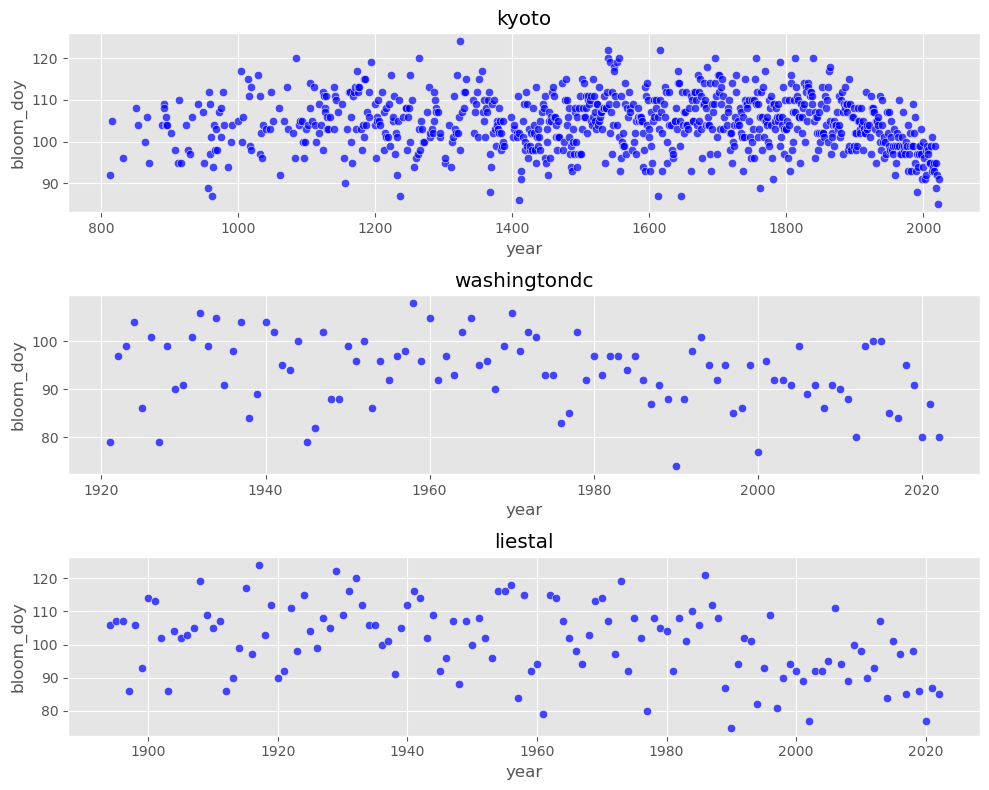

In [102]:
plot_scatter([KYOTO, DC, SCHWIEZ])

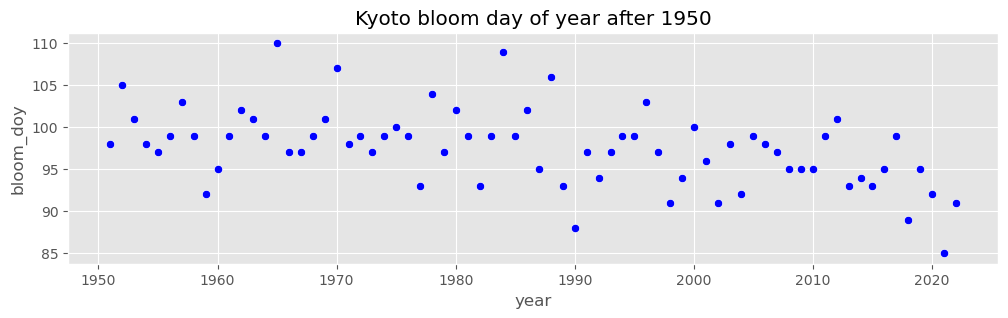

In [130]:
# lets zoom in on Kyoto
kyoto_after_1950 = KYOTO[KYOTO['year'] > 1950]
plt.figure(figsize=(12, 3))
sns.scatterplot(
    x=kyoto_after_1950['year'], y=kyoto_after_1950['bloom_doy'],
    color='blue'
)
plt.title('Kyoto bloom day of year after 1950');

In [121]:
# is there more than one recorded bloom_doy per year?
print((KYOTO['year'].value_counts().values > 1).sum())
print((DC['year'].value_counts().values > 1).sum())
print((SCHWIEZ['year'].value_counts().values > 1).sum())

0
0
0


In [136]:
# are there any years (from beginning to end) with missing obs.?
print((KYOTO['year'].diff().values > 1).sum())
print((DC['year'].diff().values > 1).sum())
print((SCHWIEZ['year'].diff().values > 1).sums())

153
0
0
